# InteriorNet data

In [ ]:
import cv2
label_path = 'dataset/InteriorNet_mini/3FO4J6DV38EC_Guest_room/label0/data/10_nyu.png'
# label_path = 'dataset/cityscapes/gtFine/train/aachen/aachen_000000_000019_gtFine_labelTrainIds.png'
label = cv2.imread(label_path, 0)

(480, 640) [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


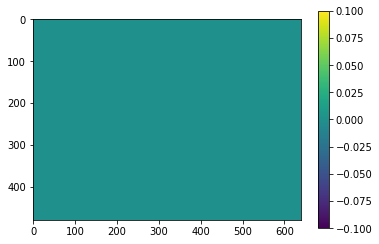

In [36]:
print(label.shape, label)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(label)
plt.colorbar()
plt.show()

(480, 640) [[4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 1.5259022e-05
  1.5259022e-05 1.5259022e-05]
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 1.5259022e-05
  1.5259022e-05 1.5259022e-05]
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 1.5259022e-05
  1.5259022e-05 1.5259022e-05]
 ...
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 3.8147555e-04
  3.8147555e-04 3.8147555e-04]
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 3.8147555e-04
  3.8147555e-04 3.8147555e-04]
 [4.5777066e-05 4.5777066e-05 4.5777066e-05 ... 3.8147555e-04
  3.8147555e-04 3.8147555e-04]]


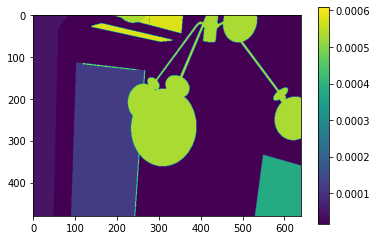

In [33]:
label = plt.imread(label_path)
print(label.shape, label)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(label)
plt.colorbar()
plt.show()

(480, 640)


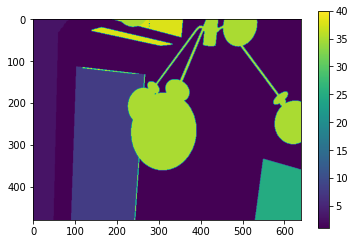

In [42]:
from PIL import Image
import numpy as np
label = np.array(Image.open(label_path).convert('L'))
print(label.shape)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(label)
plt.colorbar()
plt.show()

In [16]:
import cv2
import numpy as np
from PIL import Image
image_path = '/newfoundland2/ruizhu/InteriorNet/3FO4IVGMUKN6_Bedroom/cam0/data/4.png'
# image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # BGR 3 channel ndarray wiht shape H * W * 3
image = np.array(Image.open(image_path).convert('RGB'))

# print(image)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert cv2 read image from BGR order to RGB order
# image = np.float32(image)
print(image.shape)


(480, 640, 3)


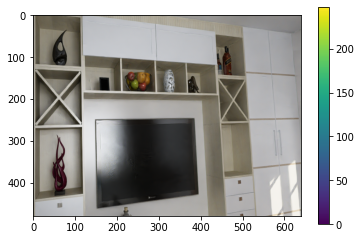

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.show()

# openrooms data

In [1]:
label_path = 'dataset/openrooms/mainDiffLight_xml1/scene0509_00/imsemLabel_1.npy'
import numpy as np

In [5]:
a = np.load(label_path)
print(a.shape, np.amax(a), np.amin(a))

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(a)
plt.colorbar()
plt.show()


(480, 640) 41 10


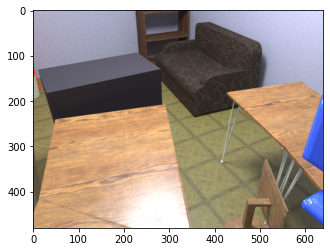

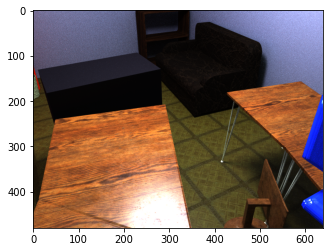

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def loadHdr(imName):
    if not(os.path.isfile(imName ) ):
        print(imName )
        assert(False )
    im = cv2.imread(imName, -1)
    # print(imName, im.shape, im.dtype)

    if im is None:
        print(imName )
        assert(False )
    # im = cv2.resize(im, (self.imWidth, self.imHeight), interpolation = cv2.INTER_AREA )
    im = np.transpose(im, [2, 0, 1])
    im = im[::-1, :, :]
    return im

def scaleHdr(hdr, seg):
    # print(hdr.shape) # (3, 480, 640)
    imWidth, imHeight = hdr.shape[2], hdr.shape[1]
    intensityArr = (hdr * seg).flatten()
    intensityArr.sort()
    # if self.split == 'train':
    #     scale = (0.95 - 0.1 * np.random.random() )  / np.clip(intensityArr[int(0.95 * imWidth * imHeight * 3) ], 0.1, None)
    #     print('scaling...')
    # else:
    scale = (0.95 - 0.05)  / np.clip(intensityArr[int(0.95 * imWidth * imHeight * 3) ], 0.1, None)
    hdr = scale * hdr
    return np.clip(hdr, 0, 1), scale 


# im_name = 'dataset/openrooms/mainDiffLight_xml/scene0385_01/im_27.hdr'
im_name = 'dataset/openrooms/main_xml1/scene0239_00/im_13.hdr'
im_name = 'dataset/openrooms/main_xml1/scene0591_02/im_18.hdr'
im_hdr = loadHdr(im_name)

seg = np.ones((1, im_hdr.shape[1], im_hdr.shape[2]))
im_hdr, scale = scaleHdr(im_hdr, seg)

im_not_hdr = np.clip(im_hdr**(1.0/2.2), 0., 1.)
image = (255. * im_not_hdr).transpose(1, 2, 0).astype(np.uint8)

plt.figure()
plt.imshow(image)
# plt.colorbar()
plt.show()


plt.figure()
plt.imshow(im_hdr.transpose((1, 2, 0)))
# plt.colorbar()
plt.show()


In [15]:
image.shape

(480, 640, 3)